# Imports

In [1]:
import pandas as pd
import numpy as np

In [2]:
import nfl_data_py as nfl

# Grabbing Data

In [31]:
seasons = range(2016, 2023 + 1)
df_pbp = nfl.import_pbp_data(seasons) 

2016 done.
2017 done.
2018 done.
2019 done.
2020 done.
2021 done.
2022 done.
2023 done.
Downcasting floats.


In [32]:
df_passes = df_pbp.query("play_type == 'pass' & air_yards.notnull()").reset_index()
df_passes = df_passes.query("season_type == 'REG'")  # remove playoff numbers

In [33]:
df_passes.head()

,index,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,...,offense_formation,offense_personnel,defenders_in_box,defense_personnel,number_of_pass_rushers,players_on_play,offense_players,defense_players,n_offense,n_defense
0,3,85.0,2016_01_BUF_BAL,2016091101,BAL,BUF,REG,1,BAL,home,...,SHOTGUN,"2 RB, 1 TE, 2 WR",6.0,"4 DL, 3 LB, 4 DB",3.0,41302;40078;38540;35553;43295;38582;40053;4336...,00-0029892;00-0027714;00-0032965;00-0029893;00...,00-0031171;00-0029542;00-0029566;00-0030073;00...,11.0,11.0
1,5,130.0,2016_01_BUF_BAL,2016091101,BAL,BUF,REG,1,BAL,home,...,I_FORM,"2 RB, 1 TE, 2 WR",7.0,"4 DL, 3 LB, 4 DB",5.0,40078;38540;41302;35553;38582;43295;40053;4336...,00-0029892;00-0027714;00-0032965;00-0029893;00...,00-0029542;00-0031171;00-0029566;00-0030073;00...,11.0,11.0
2,9,216.0,2016_01_BUF_BAL,2016091101,BAL,BUF,REG,1,BUF,away,...,SHOTGUN,"1 RB, 2 TE, 2 WR",7.0,"3 DL, 4 LB, 4 DB",4.0,34479;40111;41277;37249;41230;36089;37100;3567...,00-0027004;00-0030046;00-0028112;00-0031325;00...,00-0031170;00-0027560;00-0027965;00-0031296;00...,11.0,10.0
3,11,261.0,2016_01_BUF_BAL,2016091101,BAL,BUF,REG,1,BUF,away,...,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"1 DL, 5 LB, 5 DB",3.0,34479;40111;41277;37249;41230;36089;40112;3710...,00-0027004;00-0030046;00-0028112;00-0031325;00...,00-0031170;00-0027560;00-0027965;00-0031296;00...,10.0,10.0
4,13,310.0,2016_01_BUF_BAL,2016091101,BAL,BUF,REG,1,BAL,home,...,SHOTGUN,"1 RB, 2 TE, 2 WR",7.0,"4 DL, 3 LB, 4 DB",4.0,38540;41302;35553;38582;43295;40053;43369;4011...,00-0027714;00-0032965;00-0029893;00-0026223;00...,00-0029542;00-0031171;00-0029566;00-0030073;00...,11.0,11.0


In [34]:
df_passes["pass_length_air_yards"] = np.where(
      df_passes["air_yards"] >= 20, "long", "short"
)

In [35]:
df_passes["passing_yards"] = np.where(
          df_passes["passing_yards"].isnull(), 0,
          df_passes["passing_yards"]
        )

# Player Stability for Passing Yards

## Passing Attempts and Yards per Attempt 

In [38]:
df_passes_by_season = df_passes.groupby(["passer_id", "passer", "season"]).agg({"passing_yards": ["mean", "count"]})
df_passes_by_season

passing_yards      
                                        mean count
passer_id  passer       season                    
00-0019596 T.Brady      2016        8.245939   431
                        2017        7.877797   581
                        2018        7.667253   568
                        2019        6.618271   613
                        2020        7.645215   606
...                                      ...   ...
00-0038598 J.Hall       2023       10.100000    10
00-0039150 B.Young      2023        5.362857   350
00-0039152 W.Levis      2023        6.946667   150
00-0039163 C.Stroud     2023        8.483117   385
00-0039164 A.Richardson 2023        6.869048    84

[808 rows x 2 columns]

Remove the season of a player, if they have less than 100 passing attemtps.

In [39]:
df_passes_by_season.columns = list(map("_".join, df_passes_by_season.columns.values))
df_passes_by_season.rename(columns={'passing_yards_mean': 'ypa', 'passing_yards_count': 'n'}, inplace=True)

In [40]:
df_passes_by_season.sort_values(by=["ypa"], ascending=False).head(20)

,,,ypa,n
passer_id,passer,season,,
00-0035544,T.Kennedy,2021,75.0,1
00-0033132,K.Byard,2018,66.0,1
00-0031235,O.Beckham,2018,53.0,2
00-0030669,A.Wilson,2018,52.0,1
00-0029632,M.Sanu,2017,51.0,1
00-0030663,W.Snead,2016,50.0,1
00-0033280,C.McCaffrey,2018,50.0,1
00-0030279,K.Allen,2023,49.0,1
00-0033009,T.Boyd,2021,46.0,1


In [43]:
df_passes_by_season_100 = df_passes_by_season.query("n >= 100").sort_values(by=["ypa"], ascending=False)
df_passes_by_season_100

,,,ypa,n
passer_id,passer,season,,
00-0029701,R.Tannehill,2019,9.689046,283
00-0023682,R.Fitzpatrick,2018,9.617887,246
00-0037834,B.Purdy,2023,9.475247,303
00-0026143,M.Ryan,2016,9.258427,534
00-0036442,J.Burrow,2021,8.901545,518
...,...,...,...,...
00-0037327,S.Thompson,2022,5.085714,105
00-0021206,J.McCown,2018,4.944954,109
00-0031568,B.Petty,2017,4.857143,112


## Passing Yards by Season

In [44]:
df_passing_yards_by_season = df_passes.groupby(["passer_id", "passer", "season"]).agg({"passing_yards": ["sum", "count"]})
df_passing_yards_by_season

passing_yards      
                                         sum count
passer_id  passer       season                    
00-0019596 T.Brady      2016          3554.0   431
                        2017          4577.0   581
                        2018          4355.0   568
                        2019          4057.0   613
                        2020          4633.0   606
...                                      ...   ...
00-0038598 J.Hall       2023           101.0    10
00-0039150 B.Young      2023          1877.0   350
00-0039152 W.Levis      2023          1042.0   150
00-0039163 C.Stroud     2023          3266.0   385
00-0039164 A.Richardson 2023           577.0    84

[808 rows x 2 columns]

In [45]:
df_passing_yards_by_season = df_passing_yards_by_season.groupby(level=["passer_id", "passer", "season"]).filter(lambda x: x[('passing_yards', 'sum')] >= 2000)
df_passing_yards_by_season

passing_yards      
                                      sum count
passer_id  passer    season                    
00-0019596 T.Brady   2016          3554.0   431
                     2017          4577.0   581
                     2018          4355.0   568
                     2019          4057.0   613
                     2020          4633.0   606
...                                   ...   ...
00-0037077 S.Howell  2023          3339.0   486
00-0037834 B.Purdy   2023          2871.0   303
00-0038102 K.Pickett 2022          2404.0   388
                     2023          2000.0   313
00-0039163 C.Stroud  2023          3266.0   385

[233 rows x 2 columns]

In [46]:
df_passing_yards_by_season.columns = list(map("_".join, df_passing_yards_by_season.columns.values))
df_passing_yards_by_season.rename(columns={'passing_yards_sum': 'yards', 'passing_yards_count': 'n'}, inplace=True)

In [47]:
df_passing_yards_by_season.sort_values(by=["yards"], ascending=False).head(20)

yards    n
passer_id  passer           season             
00-0019596 T.Brady          2021    5316.0  717
00-0033873 P.Mahomes        2022    5250.0  648
00-0020531 D.Brees          2016    5209.0  664
00-0022924 B.Roethlisberger 2018    5129.0  672
00-0031503 J.Winston        2019    5109.0  624
00-0033873 P.Mahomes        2018    5097.0  579
00-0036355 J.Herbert        2021    5014.0  671
00-0026143 M.Ryan           2016    4944.0  534
                            2018    4924.0  607
00-0029604 K.Cousins        2016    4917.0  603
00-0033077 D.Prescott       2019    4902.0  595
00-0026498 M.Stafford       2021    4886.0  601
00-0033873 P.Mahomes        2021    4839.0  658
00-0033537 D.Watson         2020    4823.0  542
00-0031280 D.Carr           2021    4804.0  623
00-0033873 P.Mahomes        2020    4740.0  587
00-0036355 J.Herbert        2022    4739.0  697
00-0019596 T.Brady          2022    4694.0  730
00-0033106 J.Goff           2018    4688.0  559
                            2019    4638.0  625

# Which QBs are good at passing deep?

Creating a dataframe that allows us to compare QB throws on yards per average between season *n* and season *n - 1*.

In [48]:
df_passes_by_season_air_yards = df_passes.groupby(["passer_id", "passer", "season", 
                                  "pass_length_air_yards"]).agg({"passing_yards": ["mean", "count"]})

In [49]:
df_passes_by_season_air_yards.columns = list(map("_".join, df_passes_by_season_air_yards.columns.values))
df_passes_by_season_air_yards.rename(columns={'passing_yards_mean': 'ypa', 'passing_yards_count': 'n'}, inplace=True)
df_passes_by_season_air_yards.reset_index(inplace=True)

In [50]:
# grab QBs that have more than 100 short passes and 30 long passes
query = (
    '(n >= 100 & ' +
    'pass_length_air_yards == "short") | ' +
    '(n >= 30 & ' +
    'pass_length_air_yards == "long")'
)
df_passes_by_season_air_yards = df_passes_by_season_air_yards.query(query).reset_index()

In [51]:
df_passes_by_season_air_yards

,index,passer_id,passer,season,pass_length_air_yards,ypa,n
0,0,00-0019596,T.Brady,2016,long,15.860000,50
1,1,00-0019596,T.Brady,2016,short,7.246719,381
2,2,00-0019596,T.Brady,2017,long,13.487500,80
3,3,00-0019596,T.Brady,2017,short,6.982036,501
4,4,00-0019596,T.Brady,2018,long,10.306452,62
...,...,...,...,...,...,...,...
555,1345,00-0039150,B.Young,2023,short,5.070988,324
556,1346,00-0039152,W.Levis,2023,long,11.066667,30
557,1347,00-0039152,W.Levis,2023,short,5.916667,120
558,1348,00-0039163,C.Stroud,2023,long,17.604650,43


In [52]:
cols_save =["passer_id", "passer", "season",
       "pass_length_air_yards", "ypa"]
df_air_yards = df_passes_by_season_air_yards[cols_save].copy()

In [53]:
df_air_yards_lag = df_air_yards.copy()
df_air_yards_lag["season"] += 1
df_air_yards_lag.rename(columns={'ypa': 'ypa_last'}, inplace=True)

In [54]:
merged = df_air_yards.merge(df_air_yards_lag,
    how='inner',
    on=['passer_id', 'passer',
     'season', 'pass_length_air_yards']
)

In [55]:
print(
    merged[["pass_length_air_yards", "passer",
                  "season", "ypa", "ypa_last"]]
    .query('passer == "T.Brady" | passer == "A.Rodgers"')
    .sort_values(["passer", "pass_length_air_yards", "season"])
    .to_string()
)

   pass_length_air_yards     passer  season        ypa   ypa_last
47                  long  A.Rodgers    2019  11.020409  12.011628
49                  long  A.Rodgers    2020  16.512821  11.020409
51                  long  A.Rodgers    2021  13.708333  16.512821
53                  long  A.Rodgers    2022  10.312500  13.708333
45                 short  A.Rodgers    2017   6.041475   6.699812
46                 short  A.Rodgers    2018   6.697446   6.041475
48                 short  A.Rodgers    2019   6.217021   6.697446
50                 short  A.Rodgers    2020   6.766292   6.217021
52                 short  A.Rodgers    2021   6.859649   6.766292
54                 short  A.Rodgers    2022   6.239130   6.859649
0                   long    T.Brady    2017  13.487500  15.860000
2                   long    T.Brady    2018  10.306452  13.487500
4                   long    T.Brady    2019  11.515625  10.306452
6                   long    T.Brady    2020  12.691489  11.515625
8         

In [56]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passer_id              357 non-null    object 
 1   passer                 357 non-null    object 
 2   season                 357 non-null    int64  
 3   pass_length_air_yards  357 non-null    object 
 4   ypa                    357 non-null    float32
 5   ypa_last               357 non-null    float32
dtypes: float32(2), int64(1), object(3)
memory usage: 14.1+ KB


In [57]:
merged

,passer_id,passer,season,pass_length_air_yards,ypa,ypa_last
0,00-0019596,T.Brady,2017,long,13.487500,15.860000
1,00-0019596,T.Brady,2017,short,6.982036,7.246719
2,00-0019596,T.Brady,2018,long,10.306452,13.487500
3,00-0019596,T.Brady,2018,short,7.343874,6.982036
4,00-0019596,T.Brady,2019,long,11.515625,10.306452
...,...,...,...,...,...,...
352,00-0037013,Z.Wilson,2023,short,5.663158,6.454976
353,00-0037834,B.Purdy,2023,short,8.221805,7.593548
354,00-0038102,K.Pickett,2023,long,11.700000,10.928572
355,00-0038102,K.Pickett,2023,short,5.826855,5.621387


## Graph Merged Data

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

/Users/alexbishka/Documents/Projects/Fantasy/Analysis/nfldata/lib/python3.9/site-packages/seaborn/regression.py:598: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


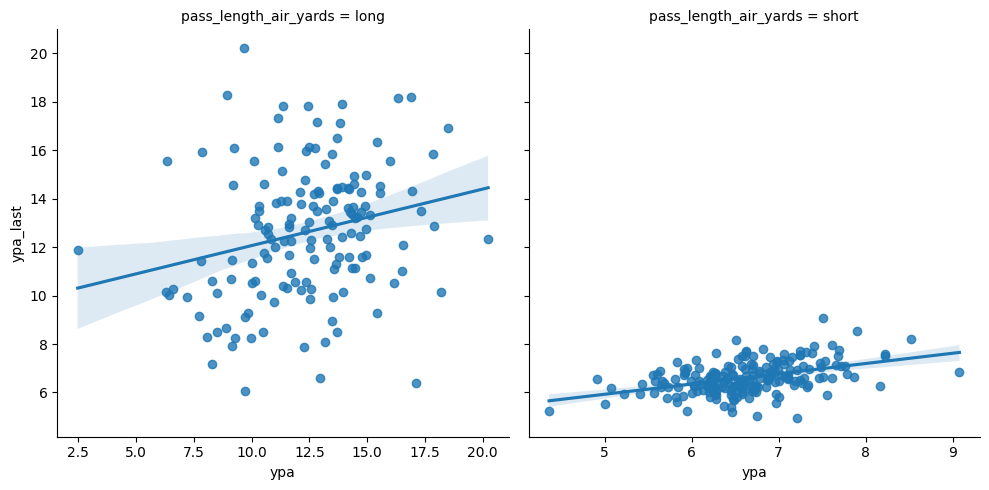

In [59]:
sns.lmplot(
    data=merged,
    x="ypa",
    y="ypa_last",
    col="pass_length_air_yards",
    sharex=False
)
plt.show();

In [60]:
merged.query("ypa.notnull() & ypa_last.notnull()")\
      .groupby("pass_length_air_yards")[["ypa", "ypa_last"]]\
      .corr()

ypa  ypa_last
pass_length_air_yards                             
long                  ypa       1.000000  0.238797
                      ypa_last  0.238797  1.000000
short                 ypa       1.000000  0.440168
                      ypa_last  0.440168  1.000000

Short passes are about twice as stable as long passes.

However, deep passes are more valuable than short passes. How do we evaluate if a passer is good at the deep bomb?

## Year by Year Leaders

In [61]:
merged.query('pass_length_air_yards == "long" & season == 2017')[["passer_id", "passer", "ypa"]] \
    .sort_values(["ypa"], ascending=False) \
    .head(10)

,passer_id,passer,ypa
41,00-0023436,A.Smith,20.230770
78,00-0026498,M.Stafford,17.830769
12,00-0020531,D.Brees,16.333334
200,00-0032950,C.Wentz,13.555555
0,00-0019596,T.Brady,13.487500
33,00-0022942,P.Rivers,13.347826
131,00-0029604,K.Cousins,12.847458
115,00-0029263,R.Wilson,12.738636
212,00-0033077,D.Prescott,12.585366
161,00-0031280,D.Carr,11.159420


In [82]:
deep_ball_qbs = dict()
top_n = 5
years = range(2017, 2023 + 1)
for year in years:
    sorted_df = merged.query(f'pass_length_air_yards == "long" & season == {year}')[["passer_id", "passer", "ypa"]] \
        .sort_values(["ypa"], ascending=False)
    for index, row in sorted_df.head(top_n).iterrows():
        name = row["passer"]
        if name not in deep_ball_qbs:
            ypa = row["ypa"]
            deep_ball_qbs[name] = [(year, ypa)]
        else:
            deep_ball_qbs[name].append((year, ypa))

In [83]:
sorted_dict = dict(sorted(deep_ball_qbs.items(), key=lambda item: len(item[1]), reverse=True))

In [84]:
sorted_dict

{'T.Tagovailoa': [(2021, 18.200000762939453),
  (2022, 17.112903594970703),
  (2023, 14.730158805847168)],
 'M.Stafford': [(2017, 17.830768585205078), (2021, 18.200000762939453)],
 'D.Brees': [(2017, 16.33333396911621), (2018, 15.539682388305664)],
 'J.Goff': [(2018, 15.539682388305664), (2023, 16.174999237060547)],
 'R.Wilson': [(2018, 14.9436616897583), (2019, 14.723684310913086)],
 'D.Carr': [(2018, 14.339285850524902), (2020, 14.258620262145996)],
 'P.Mahomes': [(2019, 15.985507011413574), (2022, 14.730158805847168)],
 'D.Prescott': [(2019, 14.723684310913086), (2023, 16.174999237060547)],
 'D.Watson': [(2019, 14.328947067260742), (2020, 14.258620262145996)],
 'M.Ryan': [(2019, 14.258620262145996), (2021, 17.112903594970703)],
 'K.Murray': [(2020, 14.231884002685547), (2021, 17.112903594970703)],
 'J.Hurts': [(2022, 14.96363639831543), (2023, 16.174999237060547)],
 'A.Smith': [(2017, 20.230770111083984)],
 'C.Wentz': [(2017, 13.55555534362793)],
 'T.Brady': [(2017, 13.4875001907348